In [1]:
import numpy as np
import matplotlib.pyplot as plt
from extra import generate_image

In [2]:
b = generate_image(2600, 32)

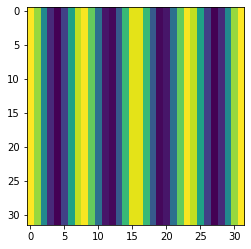

In [3]:
plt.imshow(b[0])

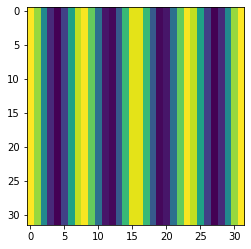

In [4]:
plt.imshow(b[1300])

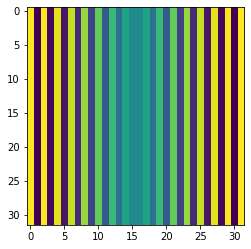

In [5]:
plt.imshow(b[-1])

In [6]:
b = generate_image(2600, 128)

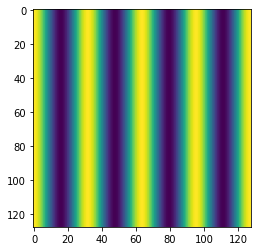

In [7]:
plt.imshow(b[0])

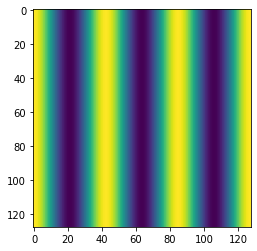

In [8]:
plt.imshow(b[1300])

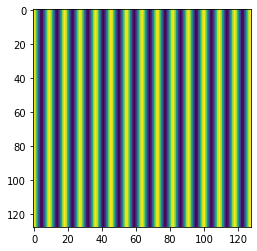

In [9]:
plt.imshow(b[-1])